In [1]:
# import the library
# Import the numpy library
import numpy as np  
# Import the pandas library
import pandas as pd
# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt
# Import the seaborn
import seaborn as sns

In [2]:
## import the data 

# load the dataset using pandas and store it in the varaible "data"
data = pd.read_excel('INF2178_A1_data.xlsx')
# call the first 5 rows for reference 
data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [3]:
# Check the data type of each fields
data.dtypes

OCCUPANCY_DATE            datetime64[ns]
ORGANIZATION_NAME                 object
PROGRAM_ID                         int64
PROGRAM_NAME                      object
SECTOR                            object
PROGRAM_MODEL                     object
OVERNIGHT_SERVICE_TYPE            object
PROGRAM_AREA                      object
SERVICE_USER_COUNT                 int64
CAPACITY_TYPE                     object
CAPACITY_ACTUAL_BED              float64
OCCUPIED_BEDS                    float64
CAPACITY_ACTUAL_ROOM             float64
OCCUPIED_ROOMS                   float64
dtype: object

In [4]:
#Display the info of data to understand the data type and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [5]:
## Add the Occupancy Rate

# Calculate shelter program occupancy rates for beds and rooms by Occupied divide Actual
data['OCCUPANCY_RATE_BED'] = data['OCCUPIED_BEDS'] / data['CAPACITY_ACTUAL_BED']
data['OCCUPANCY_RATE_ROOM'] = data['OCCUPIED_ROOMS'] / data['CAPACITY_ACTUAL_ROOM']

# Create a single 'OCCUPANCY_RATE' column by combining bed based and room based on Capacity Type Field
data['OCCUPANCY_RATE'] = data['OCCUPANCY_RATE_BED'].combine_first(data['OCCUPANCY_RATE_ROOM'])

# Display the first 10 rows of the updated data with the new 'OCCUPANCY_RATE' column
data[['OCCUPANCY_RATE_BED', 'OCCUPANCY_RATE_ROOM', 'OCCUPANCY_RATE']].head(10)

,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM,OCCUPANCY_RATE
0,NaN,0.896552,0.896552
1,NaN,1.000000,1.000000
2,NaN,0.821429,0.821429
3,NaN,1.000000,1.000000
4,NaN,0.928571,0.928571
5,0.75,NaN,0.750000
6,NaN,0.956522,0.956522
7,NaN,0.956522,0.956522
8,NaN,1.000000,1.000000
9,NaN,0.975610,0.975610


In [6]:
# Selecting categorical variables by filtering the columns with datatype 'object'
# Stores them in cat_cols
cat_cols = data.select_dtypes(include=['object']).columns

# Selecting numerical columns by filtering the columns with a numeric datatype (including int, float)
# Stores them in cat_cols and converts the result a list
num_cols = data.select_dtypes(include=np.number).columns.tolist()

# Printing the list of categorical variables
print("Categorical Variables:")
print(cat_cols)

# Printing the list of numerical variables
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['ORGANIZATION_NAME', 'PROGRAM_NAME', 'SECTOR', 'PROGRAM_MODEL',
       'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE'],
      dtype='object')
Numerical Variables:
['PROGRAM_ID', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANCY_RATE_BED', 'OCCUPANCY_RATE_ROOM', 'OCCUPANCY_RATE']


In [7]:
# Display the summary of statistics for each column
# with count, mean, sd, min, 25% percentile, median, 75% percentile, max, sd of the date and numerical columns
data.describe()

,OCCUPANCY_DATE,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM,OCCUPANCY_RATE
count,50944,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000,32399.000000,18545.000000,50944.000000
mean,2021-06-29 13:31:57.022612992,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598,0.927885,0.934087,0.930142
min,2021-01-01 00:00:00,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.022727,0.012048,0.012048
25%,2021-03-30 00:00:00,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000,0.900000,0.958333,0.923077
50%,2021-06-28 00:00:00,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000,1.000000,1.000000,1.000000
75%,2021-09-29 00:00:00,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000,1.000000,1.000000,1.000000
max,2021-12-31 00:00:00,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000,1.000000,1.014085,1.014085
std,NaN,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954,0.122562,0.163241,0.138788


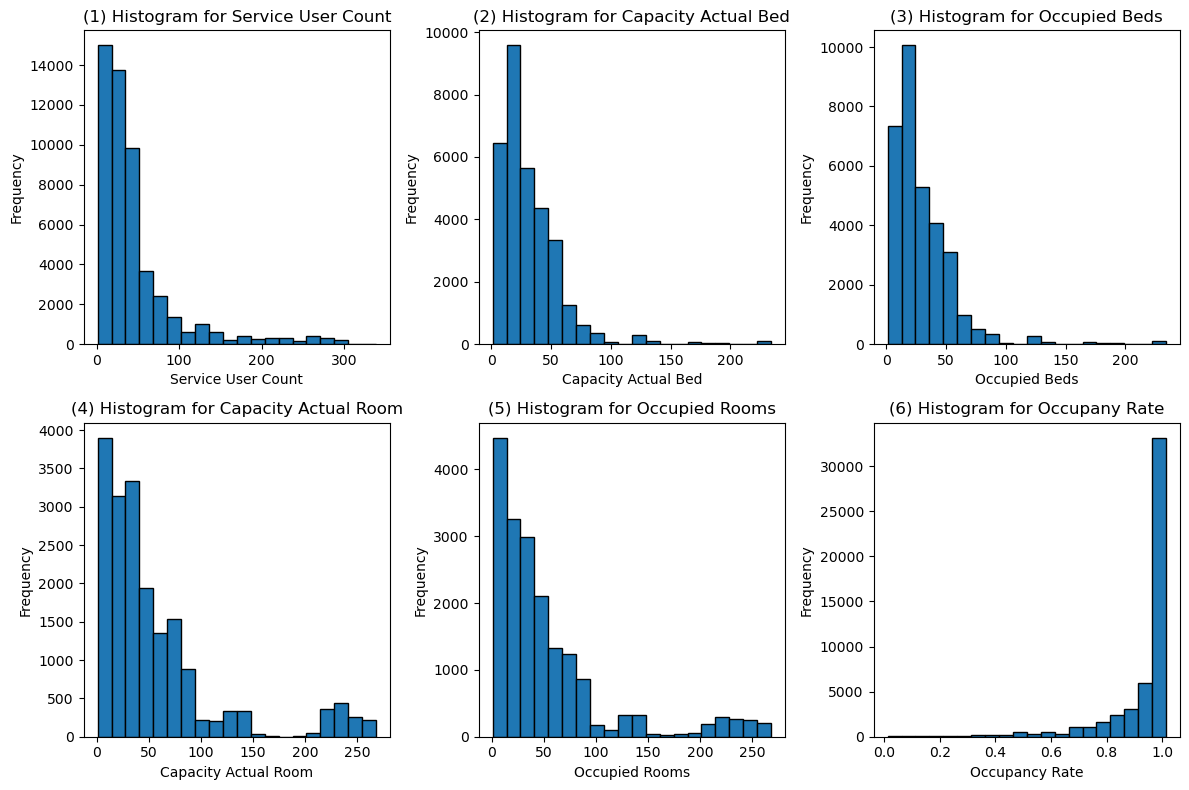

In [8]:
# Create Histograms for the numerical variables
# Create histograms for SERVICE_USER_COUNT, CAPACITY_ACTUAL_BED, OCCUPIED_BEDS, CAPACITY_ACTUAL_ROOM, OCCUPIED_ROOMS

# set up the plot with specific size
plt.figure(figsize=(12, 8))

# Histogram for 'SERVICE_USER_COUNT'
# arranges multiple plots in a 2x3 grid and at the first position
plt.subplot(2, 3, 1)   
# plot for 'SERVICE_USER_COUNT' with 20 bins and black edges
plt.hist(data['SERVICE_USER_COUNT'], bins=20, edgecolor='black') 
# give the histogram a title
plt.title('(1) Histogram for Service User Count')
# Label the x-axis
plt.xlabel('Service User Count')
# Label the y-axis
plt.ylabel('Frequency')

# Histogram for 'CAPACITY_ACTUAL_BED'
# arranges multiple plots in a 2x3 grid and at the second position
plt.subplot(2, 3, 2)
# plot for 'CAPACITY_ACTUAL_BED' with 20 bins and black edges
plt.hist(data['CAPACITY_ACTUAL_BED'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('(2) Histogram for Capacity Actual Bed')
# Label the x-axis
plt.xlabel('Capacity Actual Bed')
# Label the y-axis
plt.ylabel('Frequency')

# Histogram for 'OCCUPIED_BEDS'
# arranges multiple plots in a 2x3 grid and at the thrid position
plt.subplot(2, 3, 3)
# plot for 'OCCUPIED_BEDS' with 20 bins and black edges
plt.hist(data['OCCUPIED_BEDS'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('(3) Histogram for Occupied Beds')
# Label the x-axis
plt.xlabel('Occupied Beds')
# Label the y-axis
plt.ylabel('Frequency')

# Histogram for 'CAPACITY_ACTUAL_ROOM'
# arranges multiple plots in a 2x3 grid and at the fourth position
plt.subplot(2, 3, 4)
# plot for 'CAPACITY_ACTUAL_ROOM' with 20 bins and black edges
plt.hist(data['CAPACITY_ACTUAL_ROOM'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('(4) Histogram for Capacity Actual Room')
# Label the x-axis
plt.xlabel('Capacity Actual Room')
# Label the y-axis
plt.ylabel('Frequency')

# Histogram for 'OCCUPIED_ROOMS'
# arranges multiple plots in a 2x3 grid and at the fifth position
plt.subplot(2, 3, 5)
# plot for 'OCCUPIED_ROOMS' with 20 bins and black edges
plt.hist(data['OCCUPIED_ROOMS'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('(5) Histogram for Occupied Rooms')
# Label the x-axis
plt.xlabel('Occupied Rooms')
# Label the y-axis
plt.ylabel('Frequency')

# Histogram for 'OCCUPANCY_RATE'
# arranges multiple plots in a 2x3 grid and at the last position
plt.subplot(2, 3, 6)
# plot for 'OCCUPANCY_RATE' with 20 bins and black edges
plt.hist(data['OCCUPANCY_RATE'], bins=20, edgecolor='black')
# give the histogram a title
plt.title('(6) Histogram for Occupany Rate')
# Label the x-axis
plt.xlabel('Occupancy Rate')
# Label the y-axis
plt.ylabel('Frequency')

# show the plot with tight layout
plt.tight_layout()

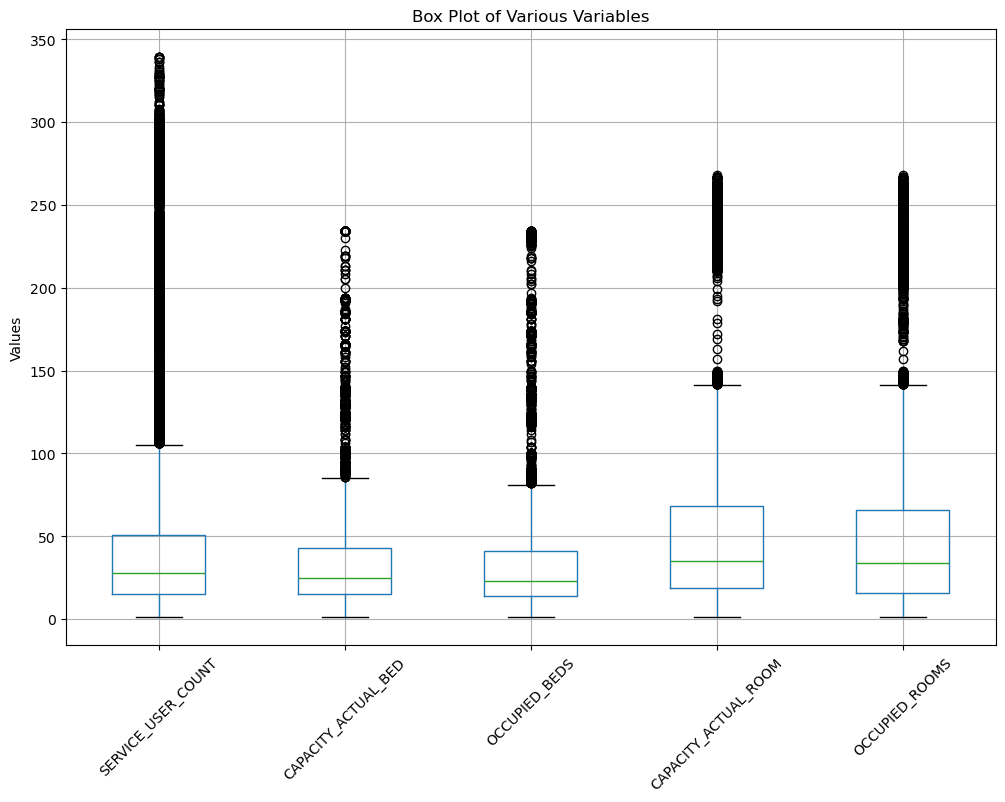

In [9]:
# Create box plot for SERVICE_USER_COUNT, CAPACITY_ACTUAL_BED, OCCUPIED_BEDS, CAPACITY_ACTUAL_ROOM, OCCUPIED_ROOMS
# set up the plot with specific size
plt.figure(figsize=(12, 8))

# Creating a list of the columns to plot
columns_to_plot = ['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']

# Plotting the box plots
# Plot it for the columns above
data.boxplot(column=columns_to_plot)
# Rotating x-axis labels
plt.xticks(rotation=45)
# give the boxplot a title
plt.title('Box Plot of Various Variables')
# Label the y-axis
plt.ylabel('Values')
# show the plot
plt.show()

In [10]:
## Data Cleaning

# Store the number of rows before cleaning
rows_before = data.shape[0]
# Filtering out occupancy rates that are below 0, above 1, or NaN values
data = data[(data['OCCUPANCY_RATE'] >= 0) & (data['OCCUPANCY_RATE'] <= 1)].dropna(subset=['OCCUPANCY_RATE'])
# Store the number of rows after cleaning
rows_after = data.shape[0]
# Calculate the number of rows removed
rows_removed = rows_before - rows_after
# Display the number of rows removed
print(f'Number of rows removed: {rows_removed}')

# Display the first few rows to verify
data.head()

Number of rows removed: 4


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571,0.928571


In [11]:
## Explore the Categorical Variables

# Displaying the unique categories within 'SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE'
sectors = data['SECTOR'].unique()
program_models = data['PROGRAM_MODEL'].unique()
overnight_service_types = data['OVERNIGHT_SERVICE_TYPE'].unique()
program_areas = data['PROGRAM_AREA'].unique()
capacity_types = data['CAPACITY_TYPE'].unique()

# print the result
print(f"SECTOR: {sectors},\nPROGRAM_MODEL: {program_models},\nOVERNIGHT_SERVICE_TYPE: {overnight_service_types},\nPROGRAM_AREA: {program_areas},\nCAPACITY_TYPE: {capacity_types}")

SECTOR: ['Families' 'Mixed Adult' 'Men' 'Women' 'Youth'],
PROGRAM_MODEL: ['Emergency' 'Transitional' nan],
OVERNIGHT_SERVICE_TYPE: ['Motel/Hotel Shelter' 'Shelter' 'Interim Housing'
 'Isolation/Recovery Site' '24-Hour Respite Site' 'Warming Centre'
 "24-Hour Women's Drop-in" nan],
PROGRAM_AREA: ['COVID-19 Response' 'Base Shelter and Overnight Services System'
 'Temporary Refugee Response' 'Winter Programs' nan],
CAPACITY_TYPE: ['Room Based Capacity' 'Bed Based Capacity']


In [12]:
## Data Cleaning

# Store the number of rows before cleaning
rows_before = data.shape[0]
# Based on prevous analysis, there are NaN values for PROGRAM_MODEL 
# Filtering out the NaN values in PROGRAM_MODEL
data = data.dropna(subset=['PROGRAM_MODEL'])
# Store the number of rows after cleaning
rows_after = data.shape[0]
# Calculate the number of rows removed
rows_removed = rows_before - rows_after
# Display the number of rows removed
print(f'Number of rows removed: {rows_removed}')


Number of rows removed: 2


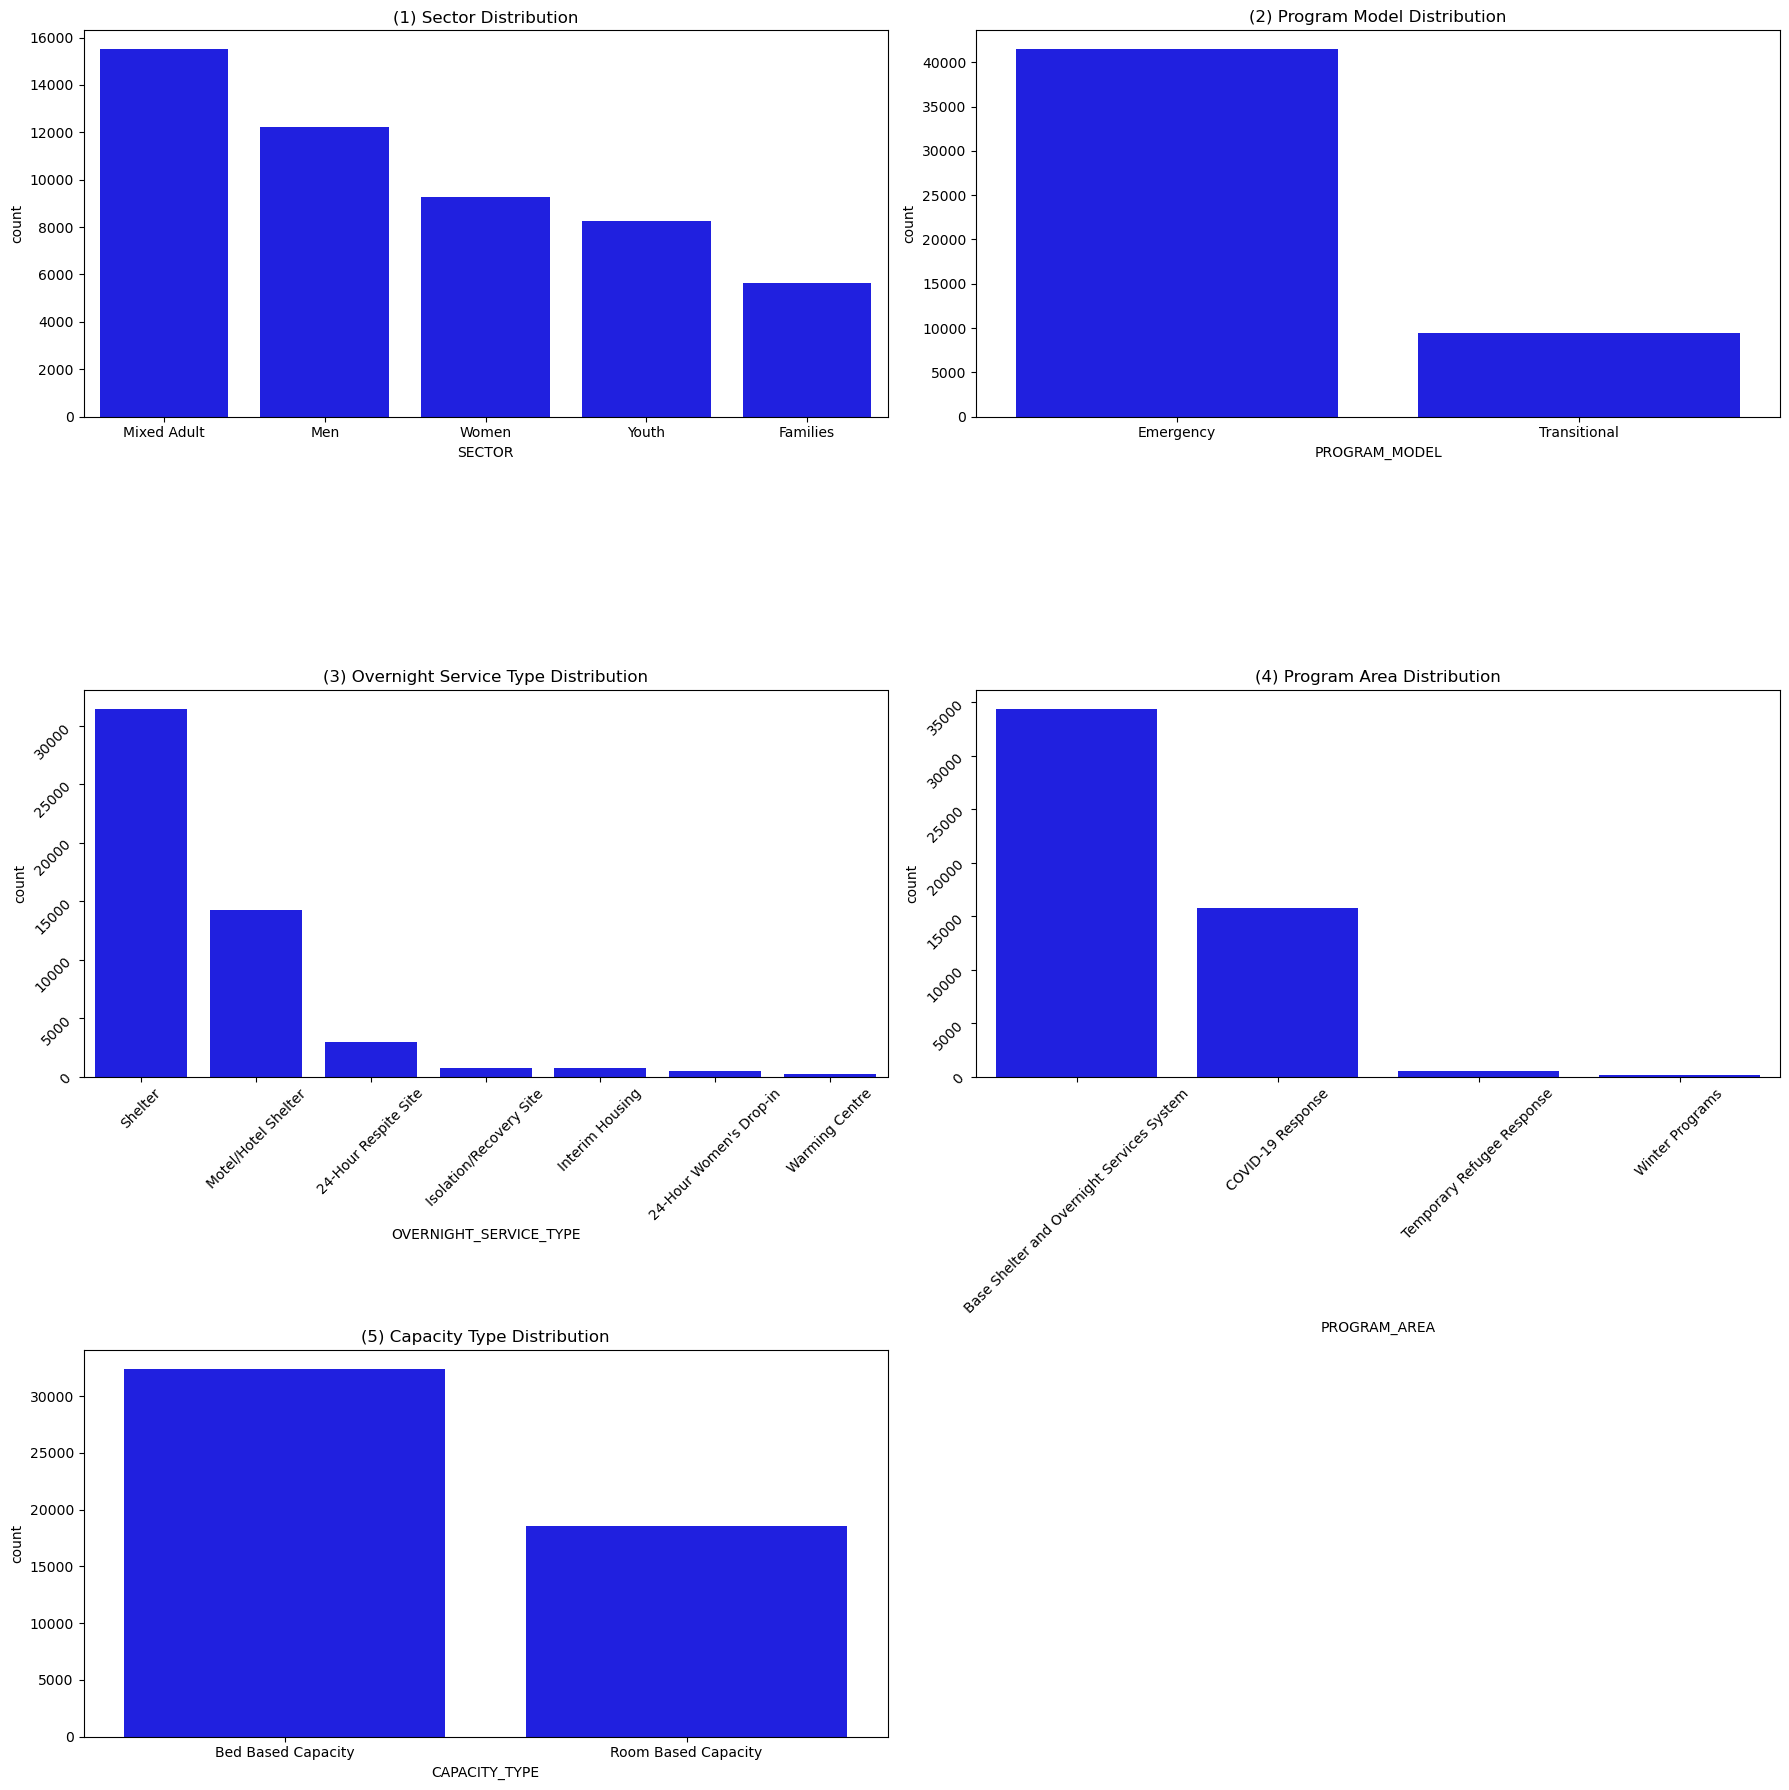

In [13]:
# Assuming 'data' is the DataFrame that contains your dataset
# set up the plot with specific size with multiple plots in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot 'SECTOR' on the top left with colour blue and arrange the bars by their frequency
sns.countplot(ax=axes[0, 0], x='SECTOR', data=data, color='blue',
              order=data['SECTOR'].value_counts().index)
# Give the plot a title
axes[0, 0].set_title('(1) Sector Distribution')
# Plot 'PROGRAM_MODEL' on the top right with colour blue and arrange the bars by their frequency
sns.countplot(ax=axes[0, 1], x='PROGRAM_MODEL', data=data, color='blue',
              order=data['PROGRAM_MODEL'].value_counts().index)
# Give the plot a title
axes[0, 1].set_title('(2) Program Model Distribution')
# Plot 'OVERNIGHT_SERVICE_TYPE' on the middle left with colour blue and arrange the bars by their frequency
sns.countplot(ax=axes[1, 0], x='OVERNIGHT_SERVICE_TYPE', data=data, color='blue',
              order=data['OVERNIGHT_SERVICE_TYPE'].value_counts().index)
# Give the plot a title
axes[1, 0].set_title('(3) Overnight Service Type Distribution')
# Plot 'PROGRAM_ARE' on the middle right with colour blue and arrange the bars by their frequency
sns.countplot(ax=axes[1, 1], x='PROGRAM_AREA', data=data, color='blue',
              order=data['PROGRAM_AREA'].value_counts().index)
# Give the plot a title
axes[1, 1].set_title('(4) Program Area Distribution')
# Plot 'CAPACITY_TYPE on the bottom left with colour blue and arrange the bars by their frequency
sns.countplot(ax=axes[2, 0], x='CAPACITY_TYPE', data=data, color='blue',
              order=data['CAPACITY_TYPE'].value_counts().index)
# Give the plot a title
axes[2, 0].set_title('(5) Capacity Type Distribution')

# Adjusting the labels middle plots for better readability
axes[1, 0].tick_params(labelrotation=45)
axes[1, 1].tick_params(labelrotation=45)

# Remove the empty subplot (bottom right)
fig.delaxes(axes[2, 1])

# show the plot with tight layout
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

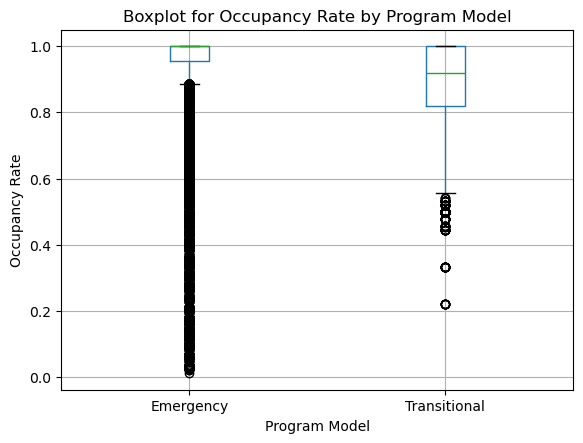

In [14]:
# box plot comparison for 'OCCUPANCY_RATE' grouped by 'PROGRAM_MODEL'
plt.figure(figsize=(12, 6))
data.boxplot(column='OCCUPANCY_RATE',  # the column of data
             by='PROGRAM_MODEL')       # the grouping variable
plt.title('Boxplot for Occupancy Rate by Program Model')    # give the boxplot a title
plt.xlabel('Program Model')    # Label the x-axis
plt.ylabel('Occupancy Rate')   # Label the y-axis
plt.suptitle('')  # remove the automatic title
plt.show()    # Show the plot

In [15]:
# Display the summary of statistic of Occupancy Rate divided into the 2 PROGRAM_MODEL: Emergency and Transitional
data.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE'].describe()

,count,mean,std,min,25%,50%,75%,max
PROGRAM_MODEL,,,,,,,,
Emergency,41537.0,0.941405,0.138563,0.012048,0.954545,1.000000,1.0,1.0
Transitional,9401.0,0.880381,0.128472,0.222222,0.818182,0.918919,1.0,1.0


In [17]:
# Import for statistical tests
from scipy.stats import ttest_ind

# Now you can use ttest_ind directly as you did in your code
t_stat, p_value = ttest_ind(x, y)


# T-test 1: comparing occupancy rates between the two PROGRAM_MODEL: Emergency and Transitional
x = data[data['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']    # Emergency as variable x
y = data[data['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']   ## Transitional as variable y

# Perform the t-test
# Compare the Emergency and Transitional groups to see if there is a statistically significant difference
t_stat, p_value = ttest_ind(x, y)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 39.06906374293522, P-value: 0.0


In [18]:
# T-test 2: comparing occupancy rates between the first half of the year and the second half of the year

# Define the two time periods:
# 1st period is from Jan - Jun
# 2nd period is from Jul - Dec
time_period_1 = (data['OCCUPANCY_DATE'] >= '2021-01-01') & (data['OCCUPANCY_DATE'] <= '2021-06-30')
time_period_2 = (data['OCCUPANCY_DATE'] >= '2021-07-01') & (data['OCCUPANCY_DATE'] <= '2021-12-31')

# separate occupancy rates for each time period
occupancy_rate_period_1 = data.loc[time_period_1, 'OCCUPANCY_RATE']
occupancy_rate_period_2 = data.loc[time_period_2, 'OCCUPANCY_RATE']

# Perform the t-test
# Compare the period1 and period2 groups to see if there is a statistically significant difference
t_stat, p_value = ttest_ind(occupancy_rate_period_1, occupancy_rate_period_2)

# Print the results
print(f"T-statistic: {t_stat},P-value: {p_value}")

T-statistic: -6.773500547823978,P-value: 1.270644163653919e-11
